In [2]:
# General Overview:
# What is the overall distribution of home_team_goals and away_team_goals?
# How many unique seasons, stages, and leagues are present in the dataset?

# Team Performance:
# Which team scored the highest total number of goals across all seasons?
# Identify top 5 teams with the highest average number of home and away gols per season.
# Find the top 10 team that has the best overall performance based on the number of wins.

# Scoring Trends:
# Explore the correlation between the number of goals scored and the outcome of the match.
# Analyze if there is any relationship between the number of goals scored by the home team and the away team.

# Goal Difference Analysis:
# Investigate matches with the highest goal differences (positive and negative).
# Determine the season with the highest average absolute goal difference.

# Temporal Trends:
# Investigate if there are any temporal trends in the average number of goals per match over the seasons.
# Explore if there is a pattern in the number of draws or away wins over the years.
 
# Country and League Interaction:
# Examine if there are any specific countries where certain leagues perform exceptionally well or poorly.
# Investigate if there are leagues that consistently have higher-scoring matches compared to others.

In [3]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
with sqlite3.connect('database.sqlite') as con:
     query1 = """
   
            SELECT
                m.id AS match_id,
                m.match_api_id,
                m.season,
                m.stage,
                m.date,
                m.home_team_goal,
                m.away_team_goal,
                t1.team_long_name AS home_team,
                league.name AS league,
                country.name AS country_name
            FROM
                match m
            JOIN
                team t1 ON m.home_team_api_id = t1.team_api_id
            JOIN
                league ON m.league_id = league.id
            JOIN
                country ON m.country_id = country.id;"""

# Execute Query 1
matches = pd.read_sql_query(query1, con)

# Query 2
query2 = """
    SELECT
        m.id AS match_id,
        m.match_api_id,
        m.season,
        m.stage,
        m.date,
        m.home_team_goal,
        m.away_team_goal,
        m.home_team,
        t2.team_long_name AS away_team,
        m.league_name as league,
        m.country_name
    FROM
        (
            SELECT
                match.id,
                match.match_api_id,
                match.season,
                match.stage,
                match.date,
                match.home_team_goal,
                match.away_team_goal,
                team1.team_long_name AS home_team,
                match.away_team_api_id,
                league.name AS league_name,  
                country.name AS country_name  
            FROM
                match
            JOIN
                team team1 ON match.home_team_api_id = team1.team_api_id
            JOIN
                league ON match.league_id = league.id
            JOIN
                country ON match.country_id = country.id
        ) AS m
    JOIN
        team t2 ON m.away_team_api_id = t2.team_api_id;"""

# Execute Query 2
new_df = pd.read_sql_query(query2, con)

In [5]:
new_df = new_df.drop(['match_id', 'match_api_id'], axis=1)
# new_df['home_win'] = new_df.apply(lambda row: -1 if row['home_team_goal'] < row['away_team_goal'] else (1 if row['home_team_goal'] > row['away_team_goal'] else 0), axis=1)
# new_df['away_win'] = new_df.apply(lambda row: -1 if row['home_team_goal'] > row['away_team_goal'] else (1 if row['home_team_goal'] < row['away_team_goal'] else 0), axis=1)

new_df.columns

Index(['season', 'stage', 'date', 'home_team_goal', 'away_team_goal',
       'home_team', 'away_team', 'league', 'country_name'],
      dtype='object')

General Overview:

What is the overall distribution of home_team_goals and away_team_goals?

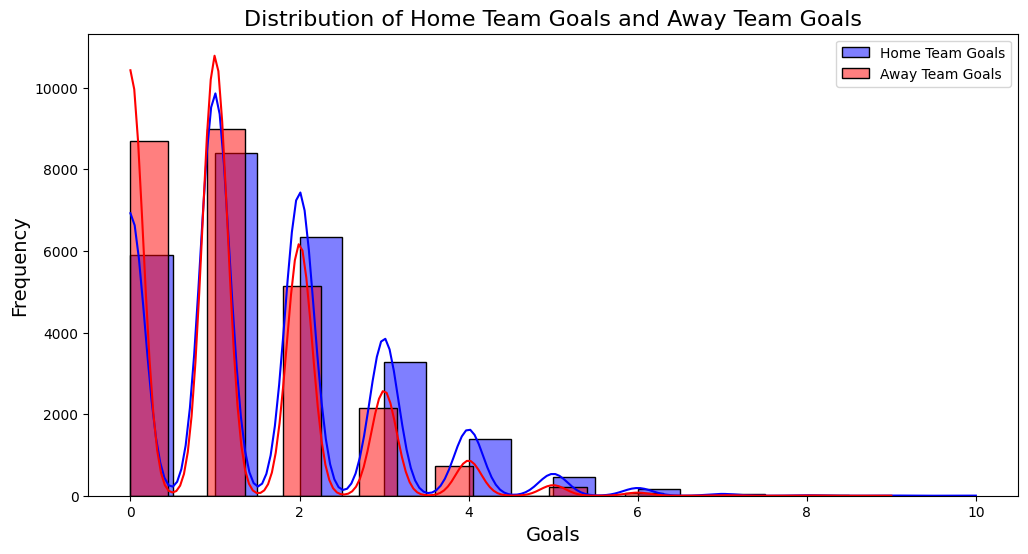

In [6]:
# Assuming 'new_df' is the DataFrame containing the specified columns
plt.figure(figsize=(12, 6))

# Plotting the distribution of home_team_goals
sns.histplot(new_df['home_team_goal'], bins=20, kde=True, color='blue', label='Home Team Goals')

# Plotting the distribution of away_team_goals
sns.histplot(new_df['away_team_goal'], bins=20, kde=True, color='red', label='Away Team Goals')

# Adding labels and title
plt.xlabel('Goals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Home Team Goals and Away Team Goals', fontsize=16)

# Adding legend
plt.legend()

# Display the plot
plt.show()



How many unique seasons, stages, and leagues are present in the dataset?

C:\Users\ronel\AppData\Local\Temp\ipykernel_4208\1245549276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.values, y=season_counts.index, ax=axes[0, 0], palette="viridis")
C:\Users\ronel\AppData\Local\Temp\ipykernel_4208\1245549276.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_counts.values, y=stage_counts.index, ax=axes[0, 1], palette="viridis")
C:\Users\ronel\AppData\Local\Temp\ipykernel_4208\1245549276.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=league_counts.values, y=league_counts.index, a

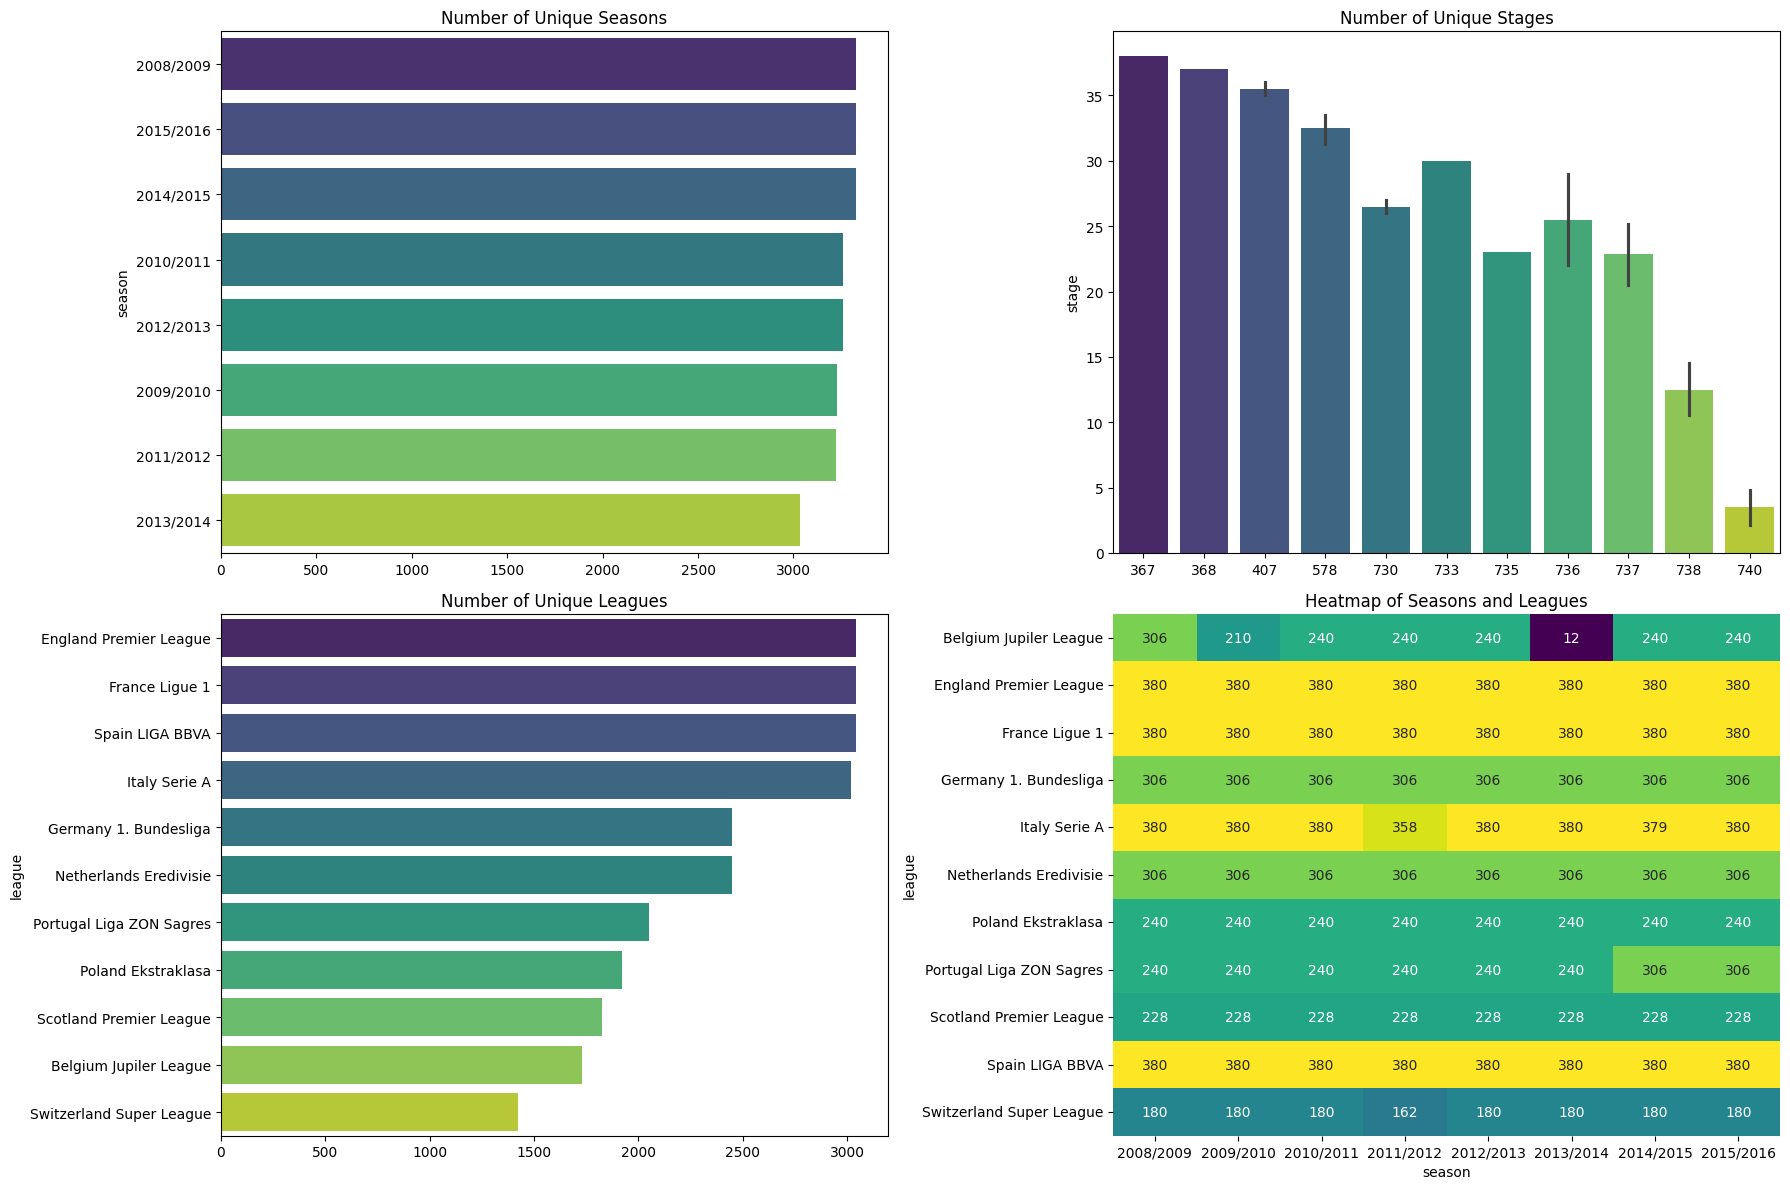

In [7]:
# Count the occurrences of each unique value
season_counts = new_df['season'].value_counts()
stage_counts = new_df['stage'].value_counts()
league_counts = new_df['league'].value_counts()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plotting the number of unique seasons
sns.barplot(x=season_counts.values, y=season_counts.index, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Number of Unique Seasons')

# Plotting the number of unique stages
sns.barplot(x=stage_counts.values, y=stage_counts.index, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Number of Unique Stages')

# Plotting the number of unique leagues
sns.barplot(x=league_counts.values, y=league_counts.index, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Number of Unique Leagues')

# Heatmap for better visualization
heatmap_data = new_df.groupby(['league', 'season']).size().unstack()
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt='g', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('Heatmap of Seasons and Leagues')

plt.tight_layout()
plt.show()

Team Performance:

Which team scored the highest total number of goals across all seasons?

In [8]:
# Combine home and away goals for each team
total_goals = pd.concat([new_df.groupby('home_team')['home_team_goal'].sum(),
                        new_df.groupby('away_team')['away_team_goal'].sum()])

# Sum the total goals for each team
total_goals_per_team = total_goals.groupby(total_goals.index).sum()

# Find the team with the highest total goals
team_highest_goals = total_goals_per_team.idxmax()
total_goals_highest = total_goals_per_team.max()

# Sum the total goals for each team
total_goals_per_team = total_goals.groupby(total_goals.index).sum()

# Sort teams by total goals in descending order
sorted_teams = total_goals_per_team.sort_values(ascending=False)

# Select the top N teams
top_teams = sorted_teams.head(10)

C:\Users\ronel\AppData\Local\Temp\ipykernel_4208\2918304163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_teams.values, y=top_teams.index, palette=colors, edgecolor='black', saturation=0.7)


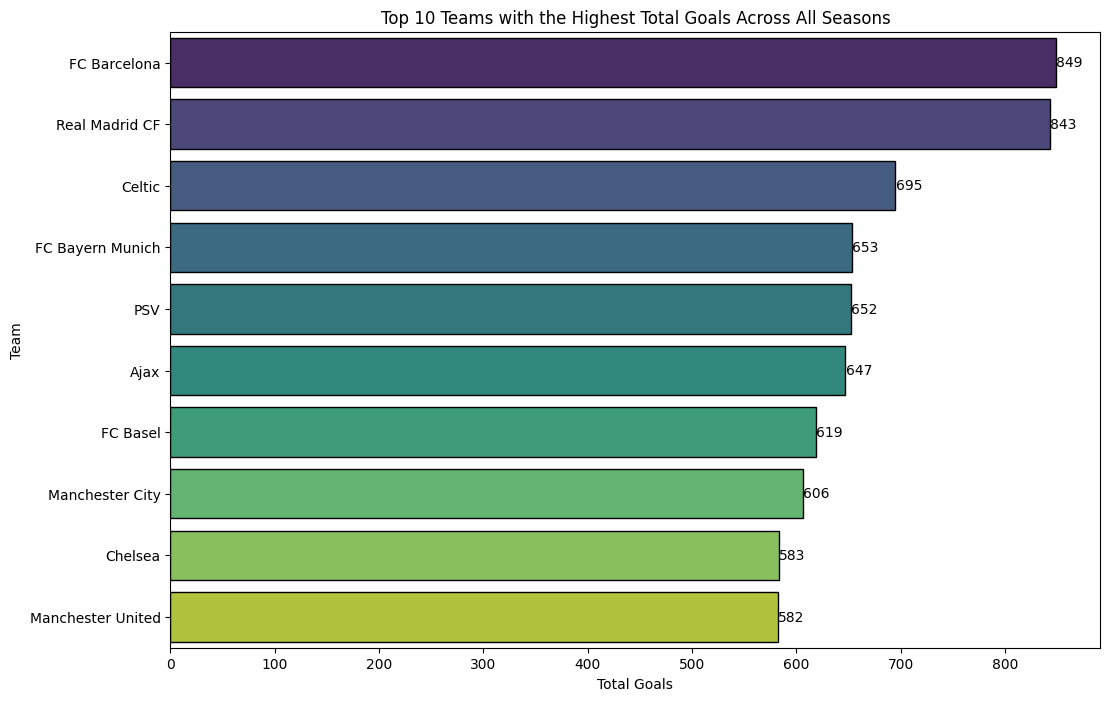

In [9]:
# Create a color palette
colors = sns.color_palette("viridis", len(top_teams))

# Create a horizontal bar plot with thinner bars and black edge color
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=top_teams.values, y=top_teams.index, palette=colors, edgecolor='black', saturation=0.7)

# Add labels to each bar
for bar, team in zip(bars.patches, top_teams.index):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Top 10 Teams with the Highest Total Goals Across All Seasons')
plt.xlabel('Total Goals')
plt.ylabel('Team')
plt.show()




Identify top 5 teams with the highest average number of home and away gols per season.

In [10]:
# Group by 'season', 'home_team', and 'away_team' and calculate the average goals
average_goals = new_df.groupby(['season', 'home_team', 'away_team'])[['home_team_goal', 'away_team_goal']].mean()

# Calculate the total goals for each team by summing home and away goals
average_goals['total_goals'] = average_goals['home_team_goal'] + average_goals['away_team_goal']

# Find the top 5 teams with the highest average total goals across all seasons
top_teams = average_goals.groupby('home_team')['total_goals'].mean().nlargest(5)

print(top_teams)

home_team
Real Madrid CF      4.289474
FC Barcelona        3.921053
PSV                 3.647059
Blackpool           3.526316
FC Bayern Munich    3.514706
Name: total_goals, dtype: float64


C:\Users\ronel\AppData\Local\Temp\ipykernel_4208\3784553411.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x=top_teams_sorted.values, y=top_teams_sorted.index, palette="viridis", ci=None, width=bar_width, edgecolor='black')
C:\Users\ronel\AppData\Local\Temp\ipykernel_4208\3784553411.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_teams_sorted.values, y=top_teams_sorted.index, palette="viridis", ci=None, width=bar_width, edgecolor='black')


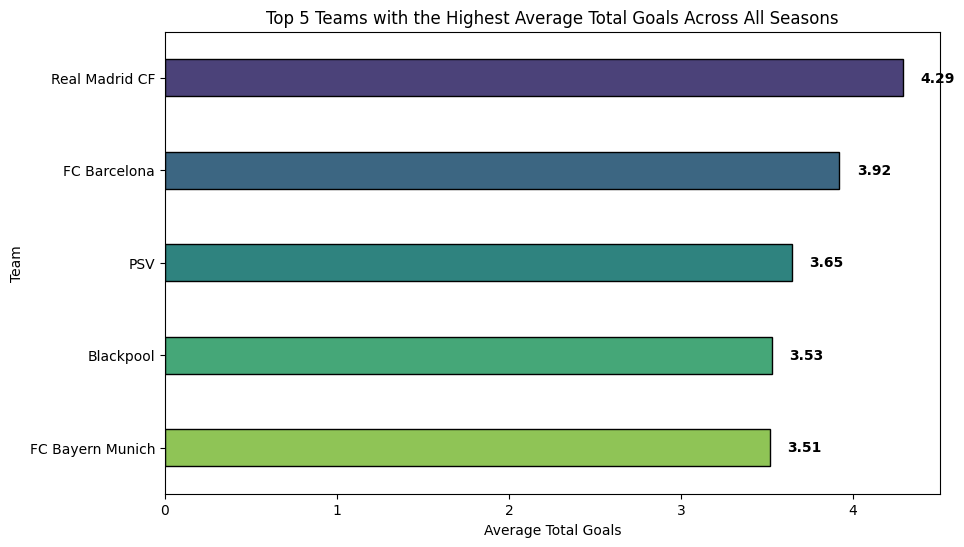

In [11]:
# Sort the DataFrame by average total goals
top_teams_sorted = top_teams.sort_values(ascending=False)

# Define the bar width
bar_width = 0.4

# Create a bar plot with annotations
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_teams_sorted.values, y=top_teams_sorted.index, palette="viridis", ci=None, width=bar_width, edgecolor='black')
plt.title('Top 5 Teams with the Highest Average Total Goals Across All Seasons')
plt.xlabel('Average Total Goals')
plt.ylabel('Team')

# Add annotations at the end of each bar
for i, v in enumerate(top_teams_sorted):
    barplot.text(v + 0.1, i, str(round(v, 2)), va='center', color='black', fontweight='bold')

plt.show()

Scoring Trends:


 
 



Explore the correlation between the number of goals scored and the outcome of the match.

In [12]:
Scoring_Trends_df = new_df.copy()

# Create a new column for total goals in a match
Scoring_Trends_df['total_goals'] = Scoring_Trends_df['home_team_goal'] + Scoring_Trends_df['away_team_goal']

# Create a new column for match outcome (win, draw, loss)
def match_outcome(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'Home Win'
    elif row['home_team_goal'] < row['away_team_goal']:
        return 'Away Win'
    else:
        return 'Draw'

Scoring_Trends_df['outcome'] = Scoring_Trends_df.apply(match_outcome, axis=1)

Scoring_Trends_df

,season,stage,date,home_team_goal,away_team_goal,home_team,away_team,league,country_name,total_goals,outcome
0,2008/2009,1,2008-08-17 00:00:00,1,1,KRC Genk,Beerschot AC,Belgium Jupiler League,Belgium,2,Draw
1,2008/2009,1,2008-08-16 00:00:00,0,0,SV Zulte-Waregem,Sporting Lokeren,Belgium Jupiler League,Belgium,0,Draw
2,2008/2009,1,2008-08-16 00:00:00,0,3,KSV Cercle Brugge,RSC Anderlecht,Belgium Jupiler League,Belgium,3,Away Win
3,2008/2009,1,2008-08-17 00:00:00,5,0,KAA Gent,RAEC Mons,Belgium Jupiler League,Belgium,5,Home Win
4,2008/2009,1,2008-08-16 00:00:00,1,3,FCV Dender EH,Standard de Liège,Belgium Jupiler League,Belgium,4,Away Win
...,...,...,...,...,...,...,...,...,...,...,...
25974,2015/2016,9,2015-09-22 00:00:00,1,0,FC St. Gallen,FC Thun,Switzerland Super League,Switzerland,1,Home Win
25975,2015/2016,9,2015-09-23 00:00:00,1,2,FC Vaduz,FC Luzern,Switzerland Super League,Switzerland,3,Away Win
25976,2015/2016,9,2015-09-23 00:00:00,2,0,Grasshopper Club Zürich,FC Sion,Switzerland Super League,Switzerland,2,Home Win
25977,2015/2016,9,2015-09-22 00:00:00,0,0,Lugano,FC Zürich,Switzerland Super League,Switzerland,0,Draw


In [13]:
correlation_matrix = Scoring_Trends_df[['total_goals']].join(pd.get_dummies(Scoring_Trends_df['outcome'])).corr()

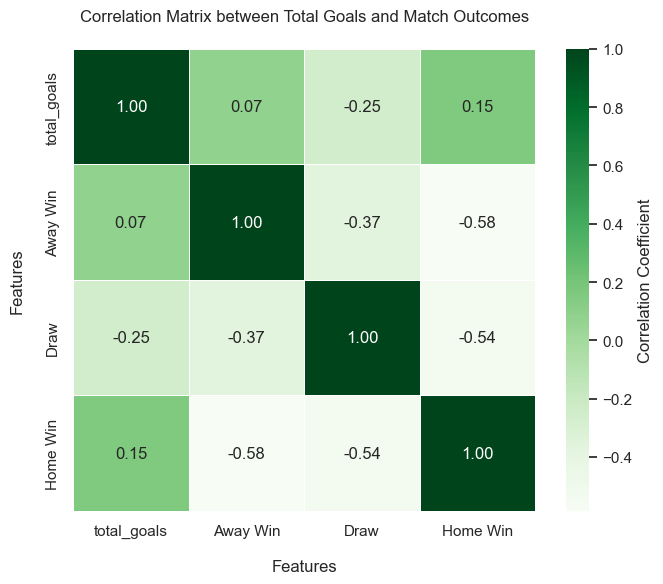

In [14]:


# Set seaborn theme for better aesthetics
sns.set_theme()

# Choose a custom colormap (replace 'Blues' with your preferred colormap)
custom_cmap = sns.color_palette("Greens", as_cmap=True)

# Plot the heatmap with the custom colormap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, cbar_kws={'label': 'Correlation Coefficient'}, fmt='.2f', linewidths=.5, square=True)

# Add labels and title
heatmap.set_title('Correlation Matrix between Total Goals and Match Outcomes', pad=20)
heatmap.set_xlabel('Features', labelpad=15)
heatmap.set_ylabel('Features', labelpad=15)

# Show the plot
plt.show()


Analyze if there is any relationship between the number of goals scored by the home team and the away team.

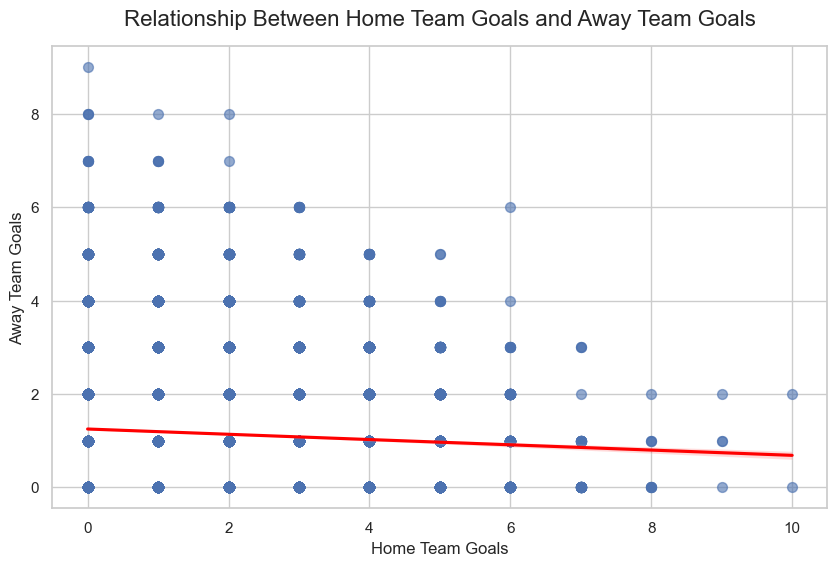

In [15]:
# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
scatter_plot = sns.regplot(x='home_team_goal', y='away_team_goal', data=Scoring_Trends_df, scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red'})

# Add labels and title
scatter_plot.set_title('Relationship Between Home Team Goals and Away Team Goals', fontsize=16, pad=15)
scatter_plot.set_xlabel('Home Team Goals', fontsize=12)
scatter_plot.set_ylabel('Away Team Goals', fontsize=12)

# Show the plot
plt.show()

Goal Difference Analysis:

Investigate matches with the highest goal differences (positive and negative).

In [16]:
Goal_D = new_df.copy()

# Calculate the absolute goal difference
Goal_D['goal_difference'] = abs(Goal_D['home_team_goal'] - Goal_D['away_team_goal'])

# Sort the DataFrame by goal difference in descending order
highest_goal_difference_matches = Goal_D.nlargest(10, 'goal_difference')

# Display the matches with the highest goal differences
print("Matches with the Highest Goal Differences:")
highest_goal_difference_matches


Matches with the Highest Goal Differences:


,season,stage,date,home_team_goal,away_team_goal,home_team,away_team,league,country_name,goal_difference
13898,2010/2011,10,2010-10-24 00:00:00,10,0,PSV,Feyenoord,Netherlands Eredivisie,Netherlands,10
7660,2015/2016,30,2016-03-13 00:00:00,0,9,ES Troyes AC,Paris Saint-Germain,France Ligue 1,France,9
20161,2010/2011,11,2010-11-06 00:00:00,9,0,Celtic,Aberdeen,Scotland Premier League,Scotland,9
2156,2009/2010,13,2009-11-22 00:00:00,9,1,Tottenham Hotspur,Wigan Athletic,England Premier League,England,8
2420,2009/2010,38,2010-05-09 00:00:00,8,0,Chelsea,Wigan Athletic,England Premier League,England,8
3338,2012/2013,18,2012-12-23 00:00:00,8,0,Chelsea,Aston Villa,England Premier League,England,8
4375,2014/2015,8,2014-10-18 00:00:00,8,0,Southampton,Sunderland,England Premier League,England,8
9761,2014/2015,21,2015-02-14 00:00:00,8,0,FC Bayern Munich,Hamburger SV,Germany 1. Bundesliga,Germany,8
22310,2010/2011,12,2010-11-20 00:00:00,0,8,UD Almería,FC Barcelona,Spain LIGA BBVA,Spain,8
22984,2011/2012,4,2011-09-17 00:00:00,8,0,FC Barcelona,CA Osasuna,Spain LIGA BBVA,Spain,8


Determine the season with the highest average absolute goal difference.

In [17]:
# Group by season and calculate the average absolute goal difference
average_goal_difference_per_season = Goal_D.groupby('season')['goal_difference'].mean()

# Find the season with the highest average absolute goal difference
highest_average_season = average_goal_difference_per_season.idxmax()
highest_average_value = average_goal_difference_per_season.max()

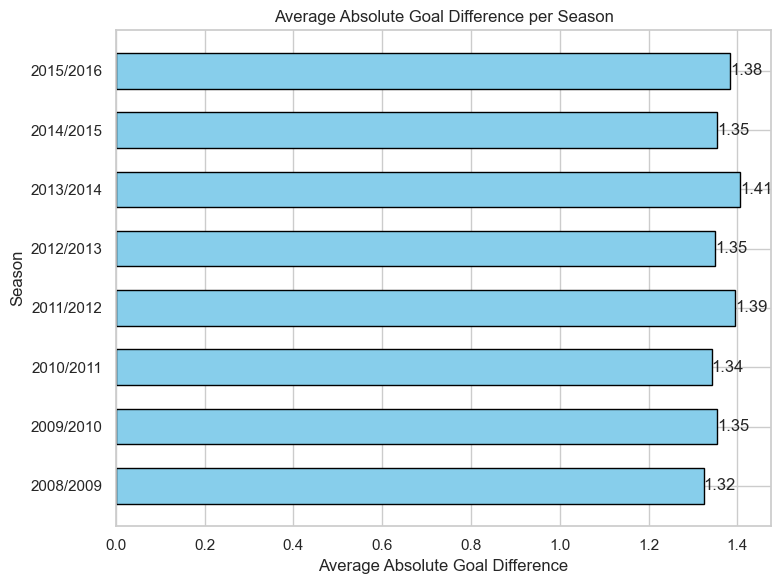

In [18]:
# Plotting the average absolute goal difference per season with horizontal and thinner bars
plt.figure(figsize=(8, 6))
bar_plot = plt.barh(average_goal_difference_per_season.index, average_goal_difference_per_season, color='skyblue', edgecolor='black', height=0.6)

# Adding labels and title
plt.xlabel('Average Absolute Goal Difference')
plt.ylabel('Season')
plt.title('Average Absolute Goal Difference per Season')

# Adding values on the right side of the bars
for bar in bar_plot:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()


Temporal Trends:

Investigate if there are any temporal trends in the average number of goals per match over the seasons.

In [40]:
Temporal_Trends_df = new_df.copy()

Temporal_Trends_df['date'] = pd.to_datetime(Temporal_Trends_df['date'])

# Extract the year from the 'date' column and create a new 'year' column
Temporal_Trends_df['year'] = Temporal_Trends_df['date'].dt.year

# Calculate the total goals per match
Temporal_Trends_df['total_goals'] = Temporal_Trends_df['home_team_goal'] + Temporal_Trends_df['away_team_goal']

# Calculate the average goals per match for each season
average_goals_per_season = Temporal_Trends_df.groupby('year')['total_goals'].mean()
average_goals_per_season




year
2008    2.626782
2009    2.637629
2010    2.678462
2011    2.679877
2012    2.778220
2013    2.761874
2014    2.707517
2015    2.677534
2016    2.826994
Name: total_goals, dtype: float64

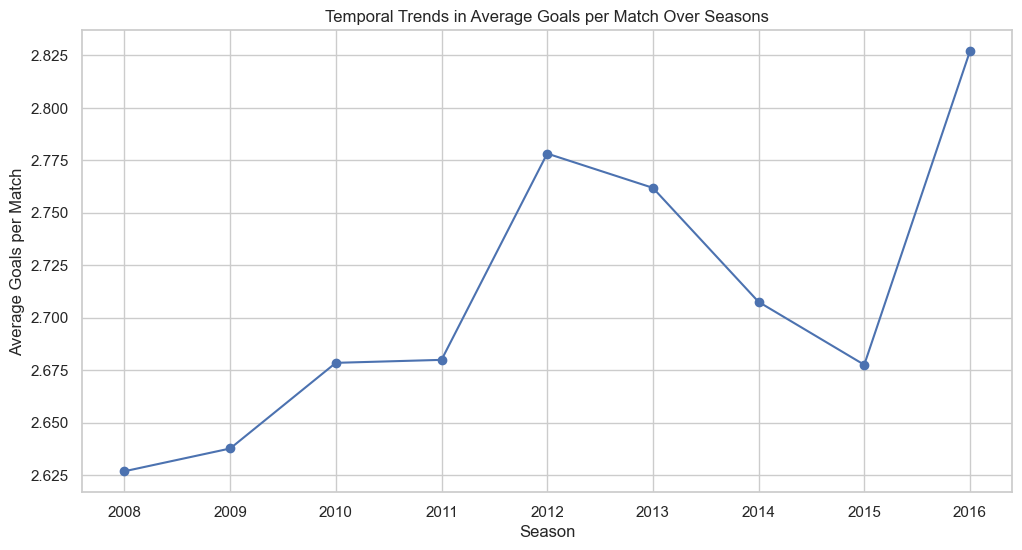

In [34]:
# Plotting the temporal trends
plt.figure(figsize=(12, 6))
plt.plot(average_goals_per_season.index, average_goals_per_season.values, marker='o', linestyle='-')
plt.title('Temporal Trends in Average Goals per Match Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Goals per Match')
plt.grid(True)
plt.show()

Explore if there is a pattern in the number of draws or away wins over the years

In [59]:
#Temporal_Trends_df.set_index('date', inplace=True)

draws = Temporal_Trends_df[Temporal_Trends_df['home_team_goal'] == Temporal_Trends_df['away_team_goal']]
away_wins = Temporal_Trends_df[Temporal_Trends_df['away_team_goal'] > Temporal_Trends_df['home_team_goal']]

draws_by_year = draws.resample('Y').size()
away_wins_by_year = away_wins.resample('Y').size()
print(draws_by_year)
print(away_wins_by_year)

date
2008-12-31    392
2009-12-31    837
2010-12-31    841
2011-12-31    846
2012-12-31    831
2013-12-31    786
2014-12-31    785
2015-12-31    867
2016-12-31    411
Freq: A-DEC, dtype: int64
date
2008-12-31     442
2009-12-31     938
2010-12-31     876
2011-12-31     899
2012-12-31     961
2013-12-31     910
2014-12-31     939
2015-12-31    1003
2016-12-31     498
Freq: A-DEC, dtype: int64


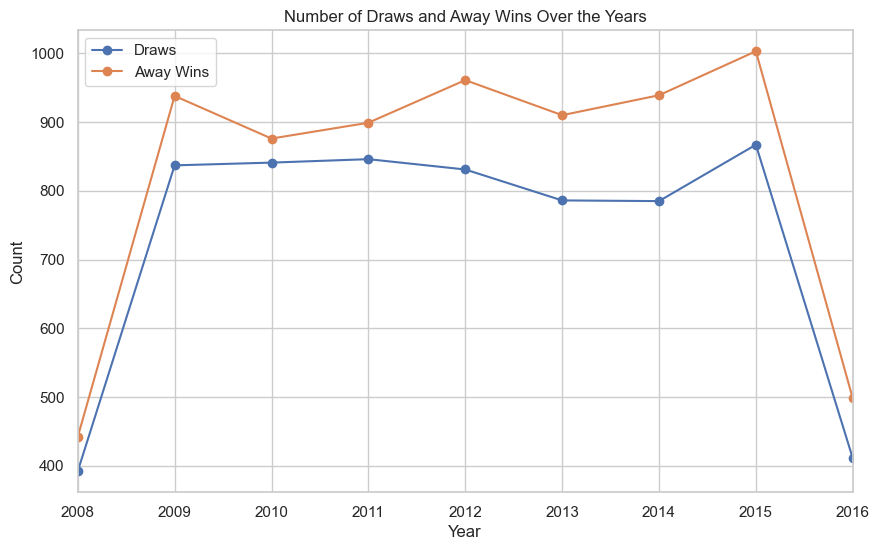

In [60]:
plt.figure(figsize=(10, 6))
draws_by_year.plot(label='Draws', marker='o')
away_wins_by_year.plot(label='Away Wins', marker='o')
plt.title('Number of Draws and Away Wins Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

Country and League Interaction:
 
 

Examine if there are any specific countries where certain leagues perform exceptionally well or poorly.

In [64]:
Country_League_Int = new_df.copy()

grouped_data = Temporal_Trends_df.groupby(['country_name', 'league'])
aggregated_stats = grouped_data[['home_team_goal', 'away_team_goal']].mean()
aggregated_stats

,,home_team_goal,away_team_goal
country_name,league,,
Belgium,Belgium Jupiler League,1.609375,1.192130
England,England Premier League,1.550987,1.159539
France,France Ligue 1,1.402961,1.040132
Germany,Germany 1. Bundesliga,1.626634,1.274918
Italy,Italy Serie A,1.500829,1.116009
Netherlands,Netherlands Eredivisie,1.779820,1.301062
Poland,Poland Ekstraklasa,1.394792,1.030208
Portugal,Portugal Liga ZON Sagres,1.408382,1.126218
Scotland,Scotland Premier League,1.429276,1.204496


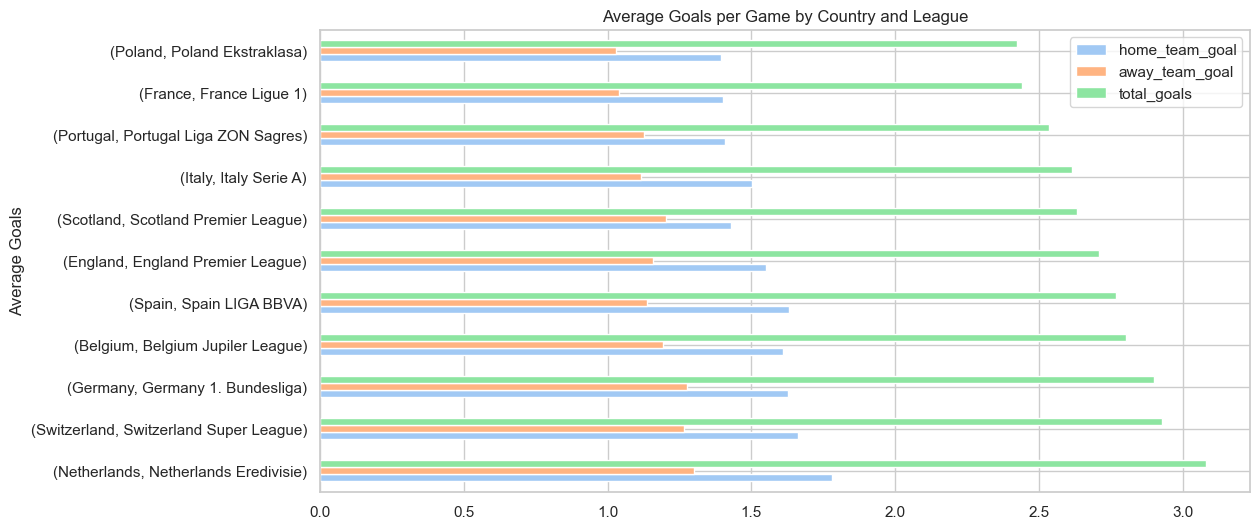

In [69]:
# Bar chart of average goals per game by country and league
aggregated_stats.plot(kind='barh', figsize=(12, 6))
plt.title('Average Goals per Game by Country and League')
plt.ylabel('Average Goals')
plt.show()

Investigate if there are leagues that consistently have higher-scoring matches compared to others.

C:\Users\ronel\AppData\Local\Temp\ipykernel_4208\986946235.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_goals_per_league.values, y=average_goals_per_league.index, palette="viridis", ax=ax)


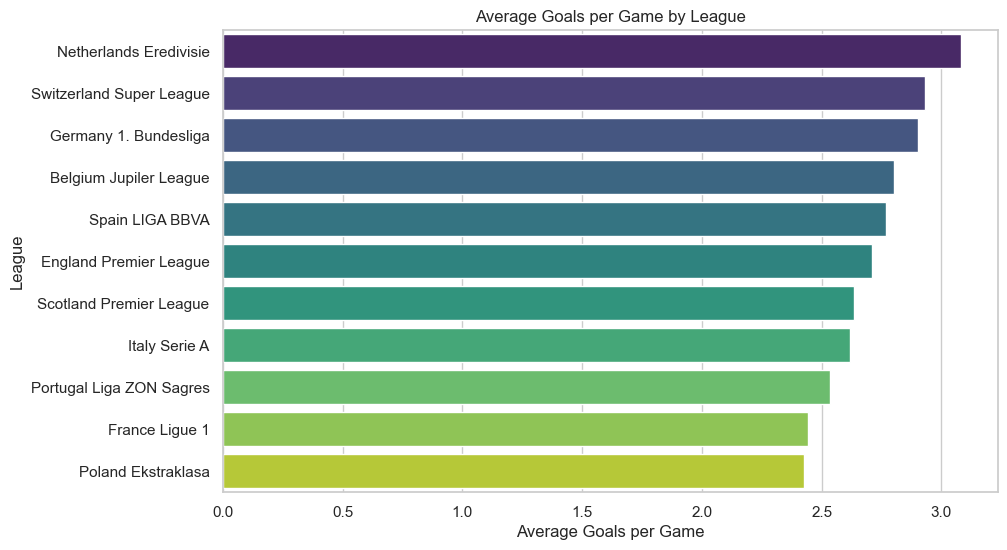

In [79]:
# Calculate average goals per game for each league
average_goals_per_league = Country_League_Int.groupby('league')['total_goals'].mean().sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
sns.barplot(x=average_goals_per_league.values, y=average_goals_per_league.index, palette="viridis", ax=ax)

# Adding labels and title
plt.title('Average Goals per Game by League')
plt.xlabel('Average Goals per Game')
plt.ylabel('League')

# Show plot
plt.show()